In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/one-hoting-code/c922535f69f527894711a61ef89e8fd.png


In [2]:
import pandas as pd
import numpy as np
# 在Jupyter中，可以直接设置显示选项
from IPython.display import display
pd.set_option('display.max_rows', 30)


data = pd.read_csv("/kaggle/input/titanic/train.csv")
data.sample(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,NaN,S
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C86,C
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.1250,NaN,Q
90,91,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#对carbin来说缺失值太多了而且感觉是找不回来了与其他列的值没什么关联

data.drop(columns=['Cabin'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [9]:
#对于Embarked来说缺失过少可以直接删除缺失的那几行
data.dropna(subset=['Embarked'],inplace=True)
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 83.3+ KB


In [10]:
#写sex这列0/1
size_mapping = {'male': 1,'female': 0}
data['Sex'] = data['Sex'].map(size_mapping)

<Axes: >

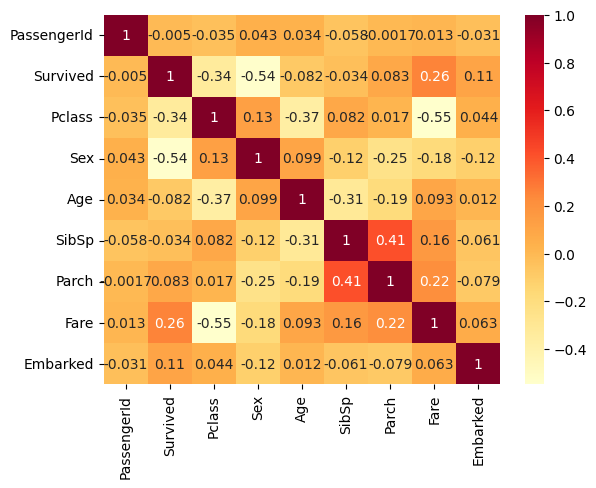

In [11]:
#数据可视化
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# 首先让我们大致看看各特征之间的相关性，相关性当然是用热力图更直观啦(*^_^*)
# 仅选择数值列计算相关性
numeric_df = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(),annot = True,cmap='YlOrRd')

[Text(0.5, 1.0, 'Embarked match survived')]

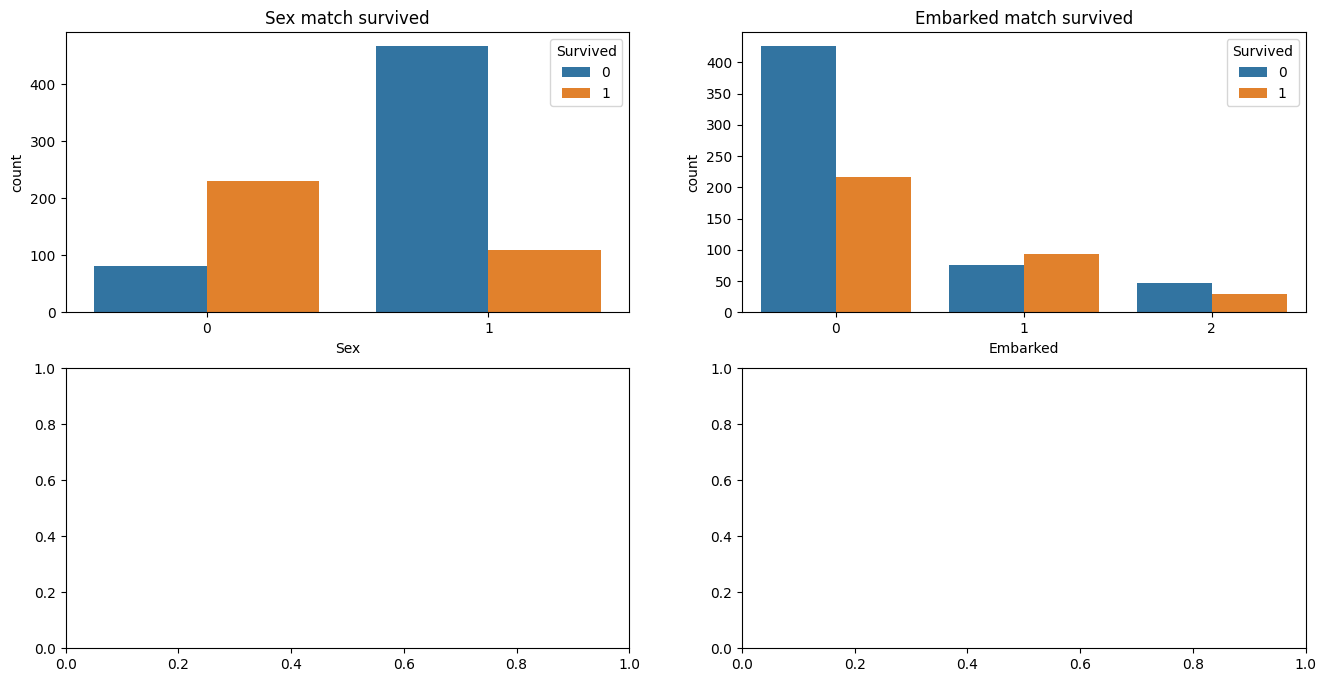

In [12]:
#接着，让我们分别看一下性别Sex、登船港口Embarkded、头衔Title和船舱等级Cabin与是否生存的对应图：
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,8))

# ax0,ax1,ax2,ax3 = axes.flatten()

ax1 = sns.countplot(x = 'Sex',hue= 'Survived',data = data,ax=axes

[0,0])
ax1.set(title='Sex match survived')

ax2 = sns.countplot(x = 'Embarked',hue= 'Survived',data = data,ax=axes[0,1])
ax2.set(title='Embarked match survived')


**<h1>可以准备算法选择然在再进行继续数据整理**

 **独热编码（One-hot Encoding)**:是一种将离散特征进行编码的方法。在机器学习中，模型只能处理数值型数据，而大部分真实世界中的数据是非数值型的，如性别、国籍、颜色等等。这时候就需要将这些非数值型数据进行编码，独热编码就是其中一种方法。

![111](kaggle/input/one-hoting-code/c922535f69f527894711a61ef89e8fd.png)
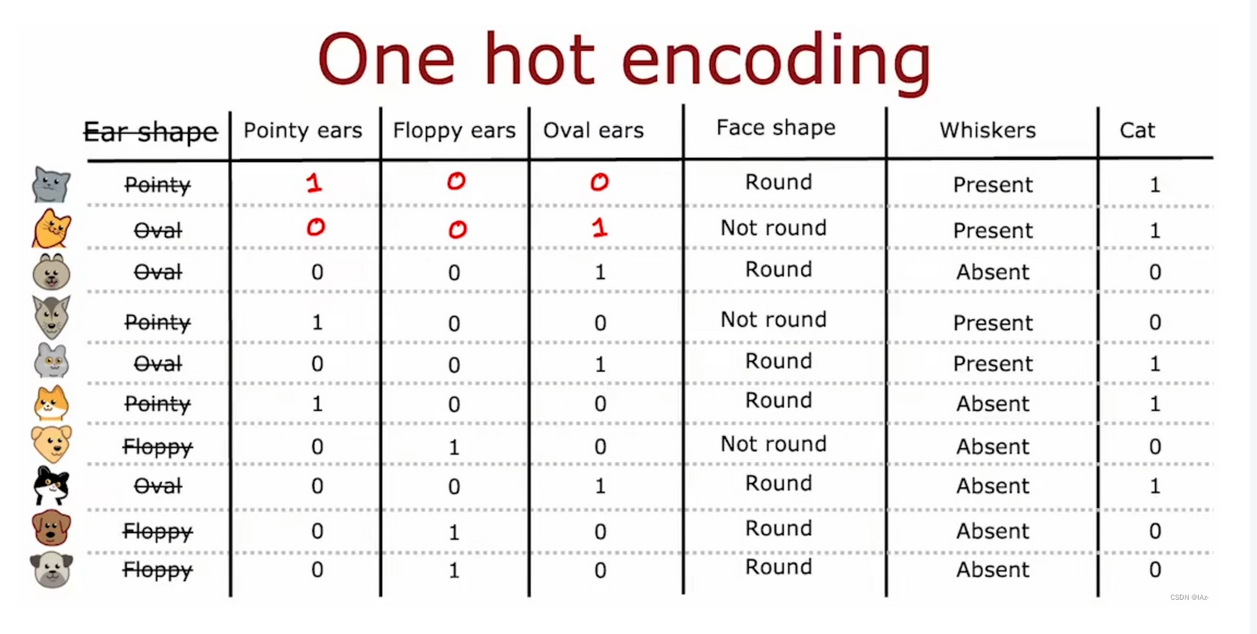

In [13]:
"""
#通过对独热编码的学习对Name进行编码
column_data = data['Name']
column_data.head(20)
# 提取 Title（向量化操作，高效）
data['Title'] = (
    data['Name']
    .str.split(',')      # 按逗号分割
    .str[1]             # 取第二部分（", "后面的内容）
    .str.split('.')      # 按句点分割
    .str[0]             # 取第一部分（"."之前的内容）
    .str.strip()        # 去除首尾空格
)
data['Title']

"""
#查看完高分的代码现在修改人名这一列
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(data['Title'], data['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [14]:
#我们可以用更常见的名称替换许多标题，或者将它们归类为稀有。
data['Title'] = data['Title'].replace([ 'Countess','Capt', 
    'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

data['Title'] = data['Title'].replace('Lady', 'Mrs')
data['Title'] = data['Title'].replace('Sir', 'Mr')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.158301
3,Mrs,0.793651
4,Rare,0.285714


In [15]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

data['Title'] = data['Title'].map(title_mapping)


data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1


In [16]:
data = data.drop(['Name', 'PassengerId'], axis=1)

In [17]:
"""
#age这一列的缺失值先用平均值填充看看
mean_value = data['Age'].mean()
data['Age'] = data['Age'].fillna(mean_value)
data.info()
"""
guess_ages = np.zeros((2,3))
#通过学习age这一列的值可以用pclass和sex来猜测填充
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = data[(data['Sex'] == i) & \
                                  (data['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
        guess_ages[i,j] = round(age_guess * 2) / 2 
for i in range(0, 2):
    for j in range(0, 3):
        data.loc[ (data.Age.isnull()) & (data.Sex == i) & (data.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

data['Age'] = data['Age'].astype(int)


In [18]:
data['AgeBand'] = pd.cut(data['Age'], 5)
data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=True).mean().sort_values(by='AgeBand', ascending=True)  # 按 AgeBand 排序         
    
data.loc[ data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age']
data.head()    

/tmp/ipykernel_13/2069383669.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=True).mean().sort_values(by='AgeBand', ascending=True)  # 按 AgeBand 排序


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeBand
0,0,3,1,1,1,0,A/5 21171,7.2500,0,1,"(16.0, 32.0]"
1,1,1,0,2,1,0,PC 17599,71.2833,1,3,"(32.0, 48.0]"
2,1,3,0,1,0,0,STON/O2. 3101282,7.9250,0,2,"(16.0, 32.0]"
3,1,1,0,2,1,0,113803,53.1000,0,3,"(32.0, 48.0]"
4,0,3,1,2,0,0,373450,8.0500,0,1,"(32.0, 48.0]"


In [19]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.300935
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [20]:
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

In [21]:
data['FareBand'] = pd.qcut(data['Fare'], 4)
data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

/tmp/ipykernel_13/2325804796.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.896]",0.197309
1,"(7.896, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.577273


In [22]:
data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[ data['Fare'] > 31, 'Fare'] = 3
data['Fare'] = data['Fare'].astype(int)

data = data.drop(['FareBand'], axis=1)  
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeBand,FamilySize,IsAlone
0,0,3,1,1,1,0,A/5 21171,0,0,1,"(16.0, 32.0]",2,0
1,1,1,0,2,1,0,PC 17599,3,1,3,"(32.0, 48.0]",2,0
2,1,3,0,1,0,0,STON/O2. 3101282,1,0,2,"(16.0, 32.0]",1,1
3,1,1,0,2,1,0,113803,3,0,3,"(32.0, 48.0]",2,0
4,0,3,1,2,0,0,373450,1,0,1,"(32.0, 48.0]",1,1
5,0,3,1,1,0,0,330877,1,2,1,"(16.0, 32.0]",1,1
6,0,1,1,3,0,0,17463,3,0,1,"(48.0, 64.0]",1,1
7,0,3,1,0,3,1,349909,2,0,4,"(-0.08, 16.0]",5,0
8,1,3,0,1,0,2,347742,1,0,3,"(16.0, 32.0]",3,0
9,1,2,0,0,1,0,237736,2,1,3,"(-0.08, 16.0]",2,0


In [23]:
data1 = pd.read_csv("/kaggle/input/titanic/test.csv")
data1['Sex'] = data1['Sex'].map(size_mapping)
data1.sample(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
241,1133,2,"Christy, Mrs. (Alice Frances)",0,45.0,0,2,237789,30.000,NaN,S
122,1014,1,"Schabert, Mrs. Paul (Emma Mock)",0,35.0,1,0,13236,57.750,C28,C
255,1147,3,"MacKay, Mr. George William",1,NaN,0,0,C.A. 42795,7.550,NaN,S
64,956,1,"Ryerson, Master. John Borie",1,13.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
345,1237,3,"Abelseth, Miss. Karen Marie",0,16.0,0,0,348125,7.650,NaN,S


In [24]:
#改age
guess_ages1 = np.zeros((2,3), dtype=float)
#通过学习age这一列的值可以用pclass和sex来猜测填充
for i in range(0, 2):
    for j in range(0, 3):
        guess_df1 = data1[(data1['Sex'] == i) & \
                                  (data1['Pclass'] == j+1)]['Age'].dropna()
        age_guess1 = guess_df1.median()

            # Convert random age float to nearest .5 age
        guess_ages1[i,j] = int( age_guess1/0.5 + 0.5 ) * 0.5
for i in range(0, 2):
    for j in range(0, 3):
        data1.loc[ (data1.Age.isnull()) & (data1.Sex == i) & (data1.Pclass == j+1),\
                    'Age'] = guess_ages1[i,j]

data1['Age'] = data1['Age'].astype(int)
    
data1.loc[ data1['Age'] <= 16, 'Age'] = 0
data1.loc[(data1['Age'] > 16) & (data1['Age'] <= 32), 'Age'] = 1
data1.loc[(data1['Age'] > 32) & (data1['Age'] <= 48), 'Age'] = 2
data1.loc[(data1['Age'] > 48) & (data1['Age'] <= 64), 'Age'] = 3
data1.loc[ data1['Age'] > 64, 'Age'] = 4


In [25]:

data1.dropna(subset=['Embarked'],inplace=True)
mean_value = data1['Age'].mean()
#data1['Age'] = data1['Age'].fillna(mean_value)

#查看完高分的代码现在修改人名这一列
data1['Title'] = data1['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data1['Title'] = data1['Title'].replace([ 'Countess','Capt', 
    'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

data1['Title'] = data1['Title'].replace('Lady', 'Mrs')
data1['Title'] = data1['Title'].replace('Sir', 'Mr')
data1['Title'] = data1['Title'].replace('Mlle', 'Miss')
data1['Title'] = data1['Title'].replace('Ms', 'Miss')
data1['Title'] = data1['Title'].replace('Mme', 'Mrs')
data1['Title'] = data1['Title'].map(title_mapping)
data1['FamilySize'] = data1['SibSp'] + data1['Parch'] + 1
data1['IsAlone'] = 0
data1.loc[data1['FamilySize'] == 1, 'IsAlone'] = 1
data1['Embarked'] = data1['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [26]:
has_nan = data1['Fare'].isna().any()
has_nan

True

In [27]:
#data1里面的Fare有缺失值
data1['Fare'].isnull().sum()

1

In [28]:
mean_value = data1['Fare'].mean()
data1['Fare'] = data1['Fare'].fillna(mean_value)

In [29]:
data1.loc[ data1['Fare'] <= 7.91, 'Fare'] = 0
data1.loc[(data1['Fare'] > 7.91) & (data1['Fare'] <= 14.454), 'Fare'] = 1
data1.loc[(data1['Fare'] > 14.454) & (data1['Fare'] <= 31), 'Fare']   = 2
data1.loc[ data1['Fare'] > 31, 'Fare'] = 3
data1['Fare'] = data1['Fare'].astype(int)


**<h1>决策树**

In [30]:

from sklearn.tree import DecisionTreeClassifier
#拟合
features = ['Pclass','Sex','Age','Fare','Title','Embarked','IsAlone']
X = data[features]
y = data['Survived']

dtree = DecisionTreeClassifier(max_depth=6)
dtree = dtree.fit(X, y)
X1 = data1[features]

Z = dtree.predict(X1)
Z

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [31]:

acc_decision_tree = round(dtree.score(X, y) * 100, 2)
acc_decision_tree

84.25

**<h1>逻辑回归**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

logreg = LogisticRegression(random_state=0)
logreg.fit(X, y)
Y_pred = logreg.predict(X1)
acc_log = round(logreg.score(X, y) * 100, 2)
acc_log

78.4

提交文件格式： 
您应该提交一个包含418个条目和一个标题行的csv文件。如果您有额外的列（超出PassengerId和Survived）或行，您的提交将显示错误。 
该文件应恰好有2列： 
PassengerId（按任何顺序排序） 
存活（包含你的二元预测：1表示存活，0表示死亡）

**<h1>支持向量机**

In [33]:
from sklearn.svm import SVC
svc = SVC(random_state=0)
svc.fit(X, y)
Y_pred = svc.predict(X1)
acc_svc = round(svc.score(X, y) * 100, 2)
acc_svc

78.29

**<h1>Random Forest**

In [34]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)
Y_pred = random_forest.predict(X1)
random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X, y) * 100, 2)
acc_random_forest

86.61

In [35]:
import csv

# 生成乘客ID列表 (892-1309)
passenger_ids = data1['PassengerId'].tolist()

# 将数据组合成行
rows = zip(passenger_ids, Y_pred)
# 写入CSV文件
with open('titanic_predictions.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['PassengerId', 'Survived'])  # 写入标题行
    writer.writerows(rows)  # 写入所有数据行